In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

In [134]:
df = pd.read_csv('house_price_regression_dataset.csv')
df.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


In [ ]:

# transform the data from square footage to square meters 
df["Square_Meter"] = df["Square_Footage"].apply(lambda x: x * 0.09290304)
df.drop(columns=["Square_Footage"], inplace=True)

# Put the square meter column as the first column
cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols]

In [102]:
df.columns

Index(['Square_Meter', 'Num_Bedrooms', 'Num_Bathrooms', 'Year_Built',
       'Lot_Size', 'Garage_Size', 'Neighborhood_Quality', 'House_Price'],
      dtype='object')

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Meter          1000 non-null   float64
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 62.6 KB


In [104]:
df.isnull().sum()

Square_Meter            0
Num_Bedrooms            0
Num_Bathrooms           0
Year_Built              0
Lot_Size                0
Garage_Size             0
Neighborhood_Quality    0
House_Price             0
dtype: int64

In [105]:
df.duplicated().sum()

np.int64(0)

In [106]:
df.head()

,Square_Meter,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,126.348134,2,1,1981,0.599637,0,5,2.623829e+05
1,396.881787,3,3,2016,4.753014,1,6,9.852609e+05
2,333.707720,1,2,2016,3.634823,0,9,7.779774e+05
3,89.744337,1,2,1977,2.730667,1,8,2.296989e+05
4,457.640375,2,1,1993,4.699073,0,8,1.041741e+06


In [107]:
df['Num_Bedrooms'].value_counts()

Num_Bedrooms
2    215
5    205
1    201
4    197
3    182
Name: count, dtype: int64

In [108]:
df['Num_Bedrooms'].value_counts().index

Index([2, 5, 1, 4, 3], dtype='int64', name='Num_Bedrooms')

C:\Users\AK127381\AppData\Local\Temp\ipykernel_36808\4157831027.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Num_Bedrooms'].value_counts().index, y=df['Num_Bedrooms'].value_counts().values, color='green', palette=sns.color_palette("Set2"))
C:\Users\AK127381\AppData\Local\Temp\ipykernel_36808\4157831027.py:10: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.barplot(x=df['Num_Bedrooms'].value_counts().index, y=df['Num_Bedrooms'].value_counts().values, color='green', palette=sns.color_palette("Set2"))


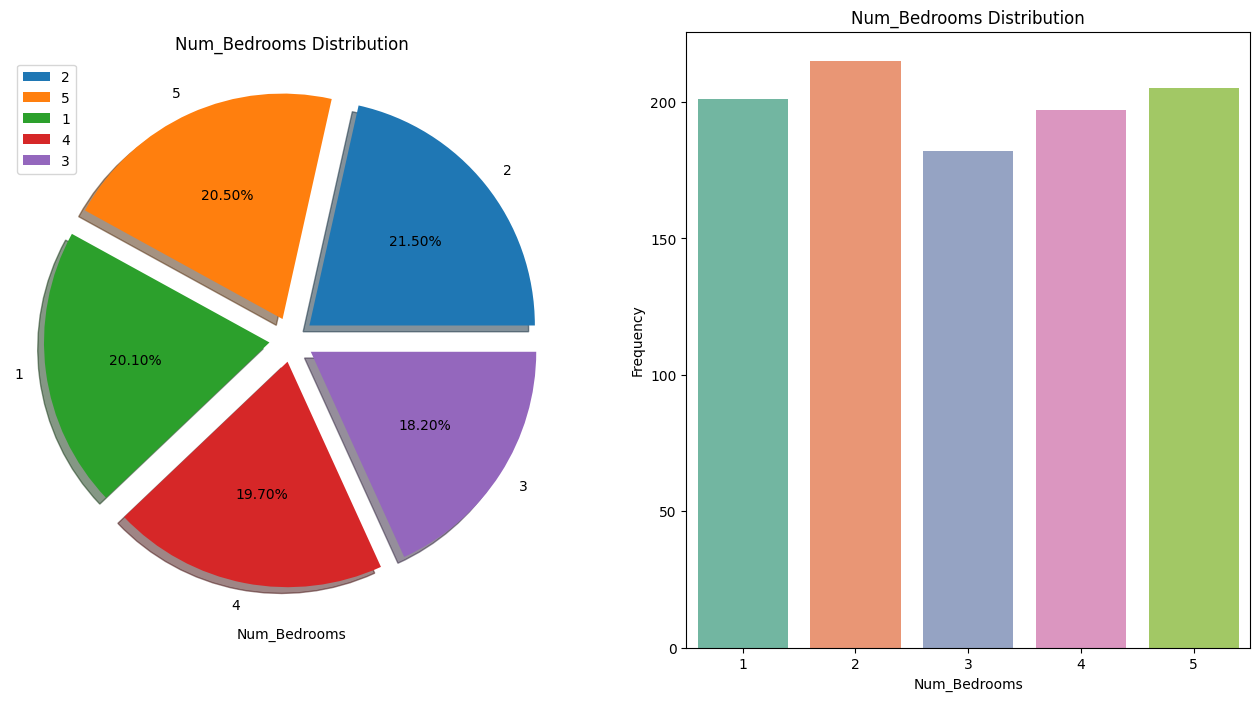

In [109]:
# Bedrooms Distribution
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1) 
plt.pie(df["Num_Bedrooms"].value_counts(), explode=[0.1,0.1,0.1,0.1,0.1], labels=df['Num_Bedrooms'].value_counts().index, shadow=True, autopct="%1.2f%%")
plt.title('Num_Bedrooms Distribution')
plt.xlabel('Num_Bedrooms')
plt.legend()

plt.subplot(1, 2, 2)
sns.barplot(x=df['Num_Bedrooms'].value_counts().index, y=df['Num_Bedrooms'].value_counts().values, color='green', palette=sns.color_palette("Set2"))
plt.title('Num_Bedrooms Distribution')
plt.xlabel('Num_Bedrooms')
plt.ylabel('Frequency')

plt.show()

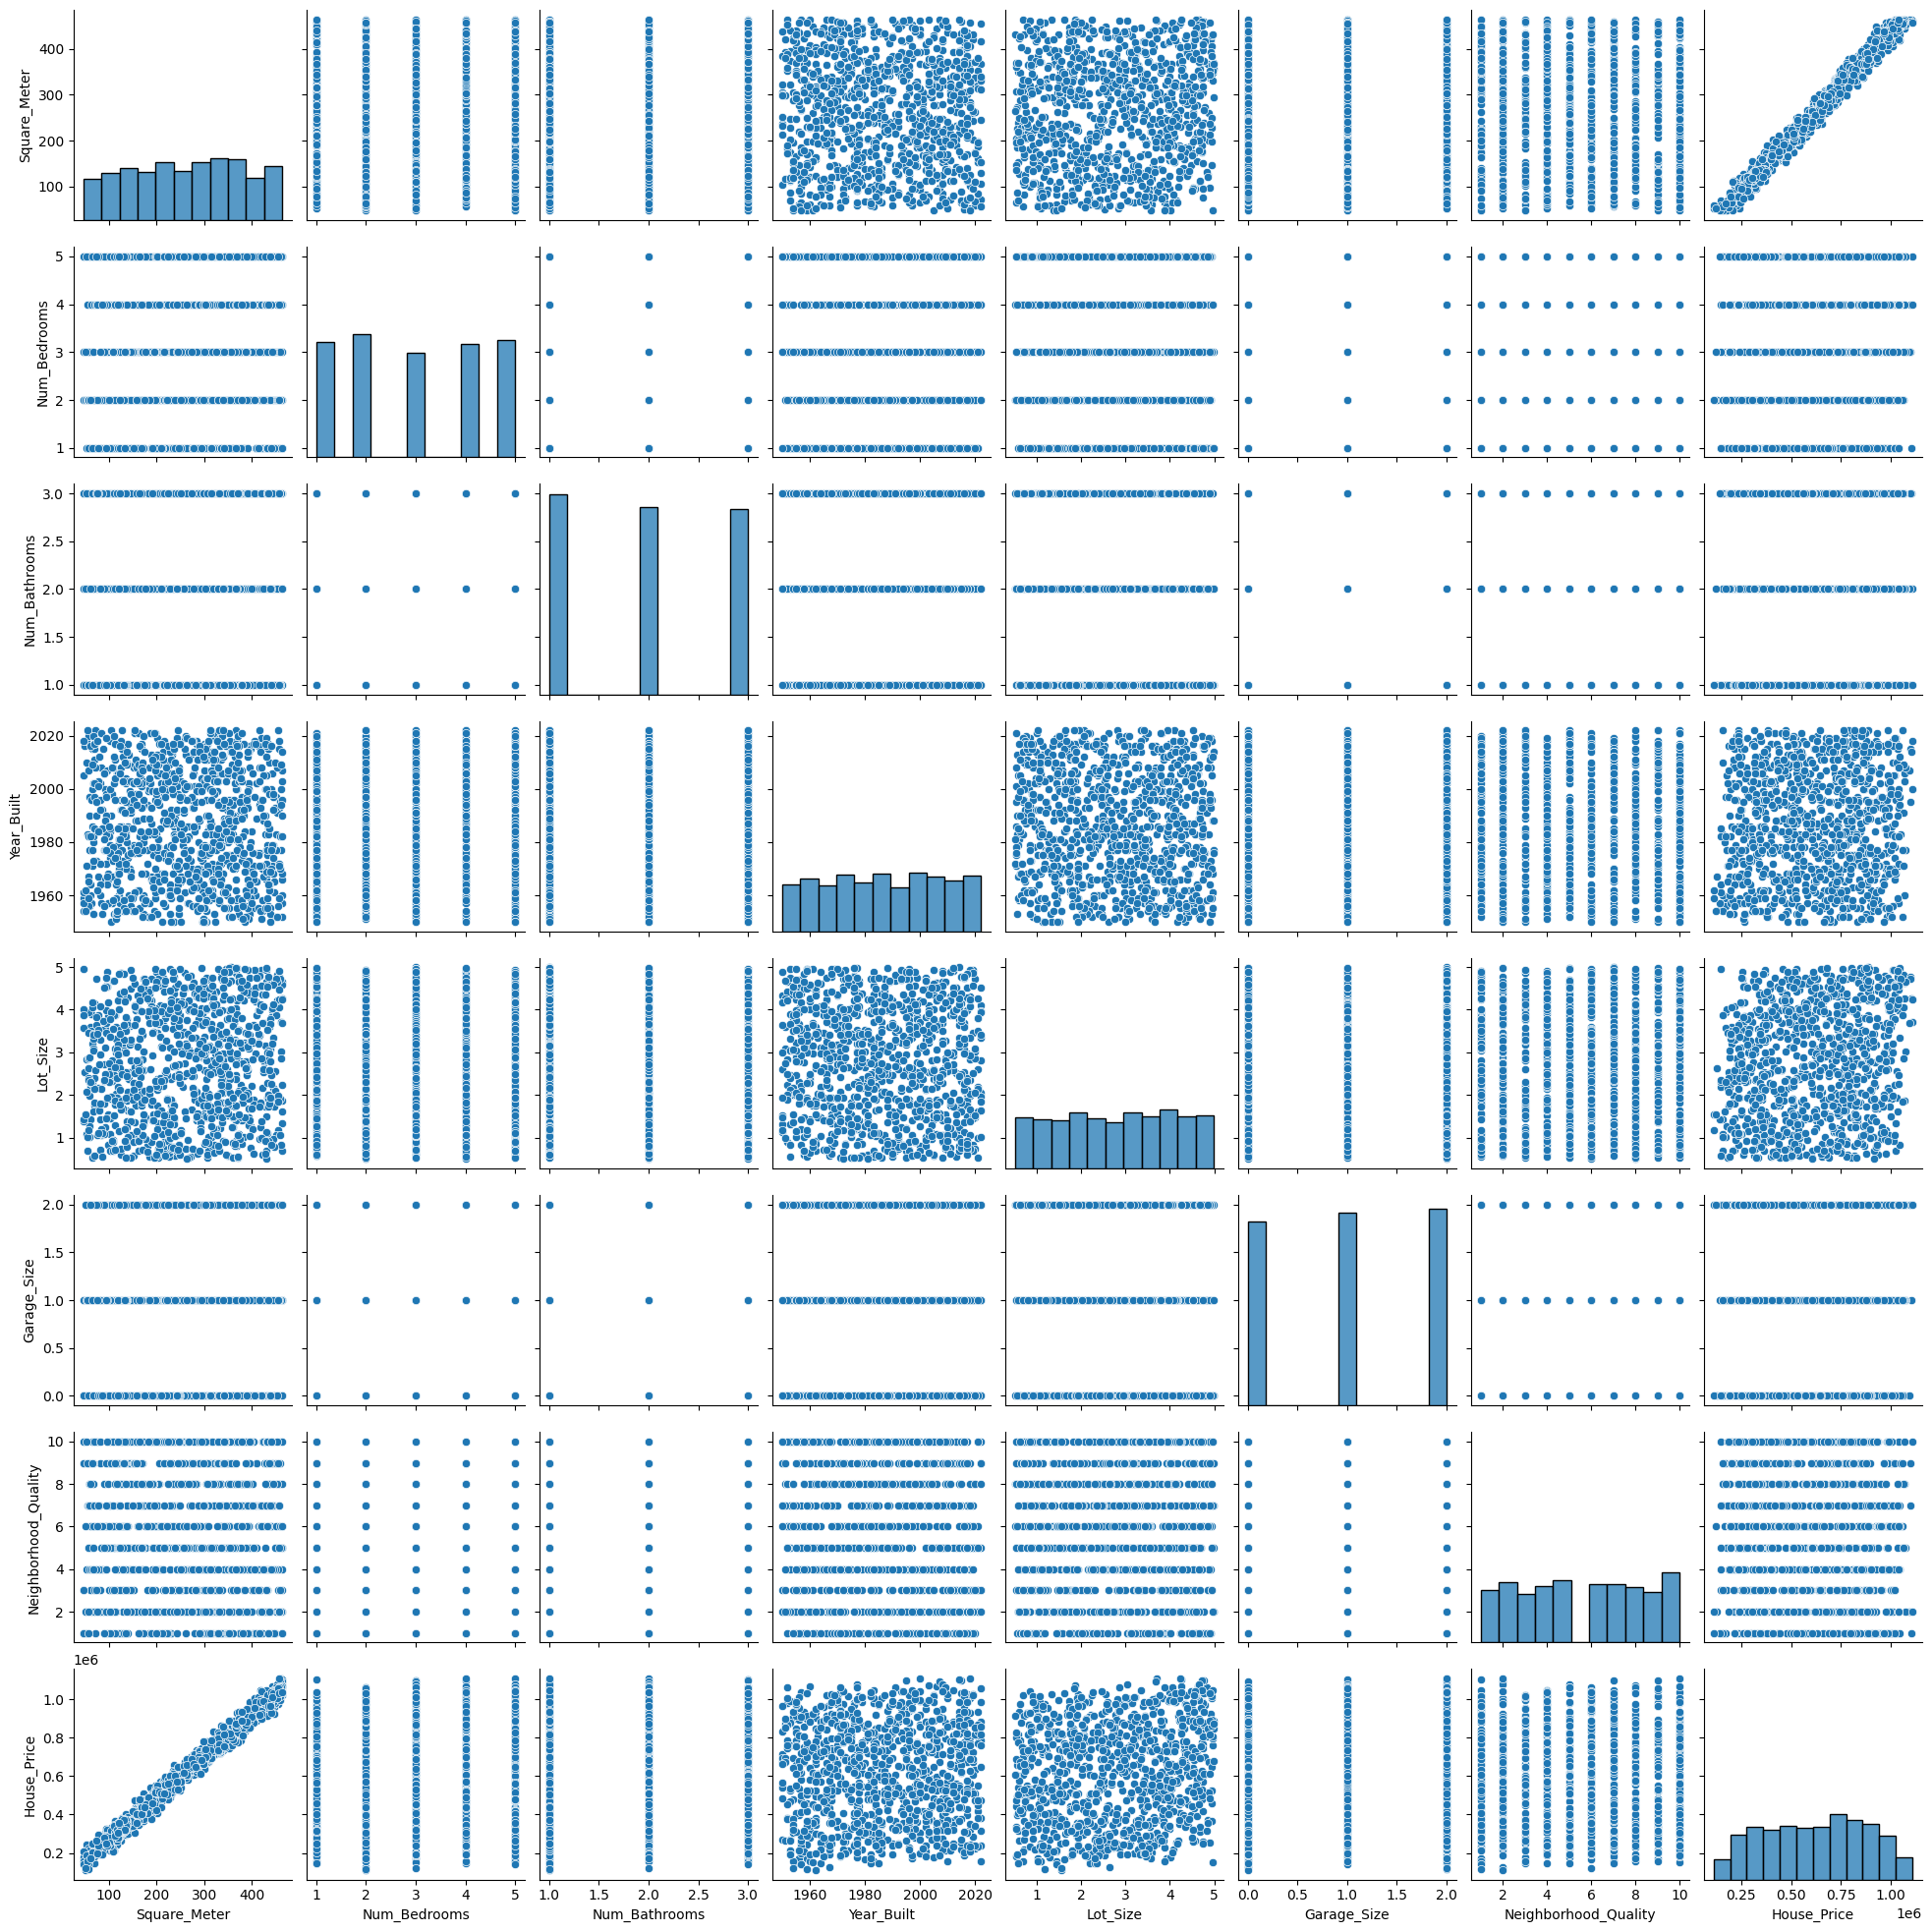

In [110]:
sns.pairplot(df)
plt.show()

In [111]:
df.corr()

,Square_Meter,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
Square_Meter,1.000000,-0.043564,-0.031584,-0.022392,0.089479,0.030593,-0.008357,0.991261
Num_Bedrooms,-0.043564,1.000000,0.022848,-0.015820,-0.009355,0.113761,-0.049024,0.014633
Num_Bathrooms,-0.031584,0.022848,1.000000,-0.021063,0.034923,0.024846,0.017585,-0.001862
Year_Built,-0.022392,-0.015820,-0.021063,1.000000,-0.061050,-0.025485,-0.009549,0.051967
Lot_Size,0.089479,-0.009355,0.034923,-0.061050,1.000000,0.002436,0.037630,0.160412
Garage_Size,0.030593,0.113761,0.024846,-0.025485,0.002436,1.000000,-0.011287,0.052133
Neighborhood_Quality,-0.008357,-0.049024,0.017585,-0.009549,0.037630,-0.011287,1.000000,-0.007770
House_Price,0.991261,0.014633,-0.001862,0.051967,0.160412,0.052133,-0.007770,1.000000


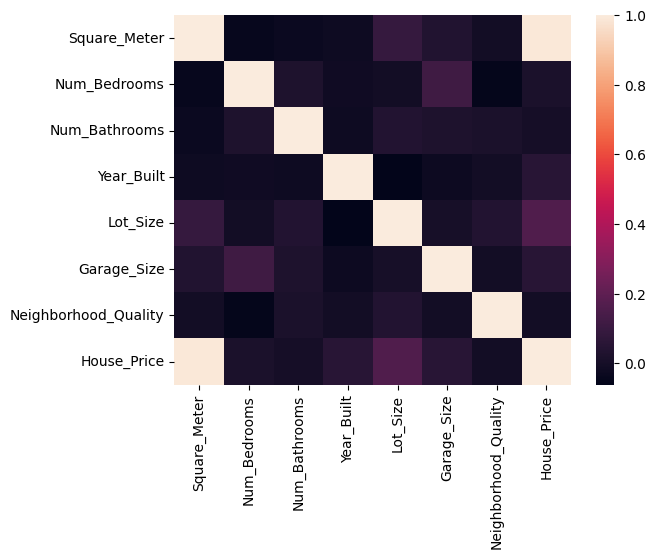

In [112]:
sns.heatmap(df.corr())
plt.show()

In [113]:
from sklearn.model_selection import train_test_split 

In [114]:
X = df.drop('House_Price', axis=1)
y = df['House_Price']

In [115]:
X.tail()

,Square_Meter,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality
995,302.956813,4,1,1978,2.165110,2,10
996,295.338764,1,2,1999,2.977123,1,10
997,242.105322,4,2,1962,4.055067,0,2
998,438.781058,5,2,1950,1.930921,0,7
999,303.607135,4,2,1983,3.108790,2,2


In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=43)

In [117]:
from sklearn.preprocessing import StandardScaler

In [118]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [119]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Mean Absolute Error: 8020.572337878656
Mean Squared Error: 103550870.27324525
R^2 Score: 0.9983775749394648


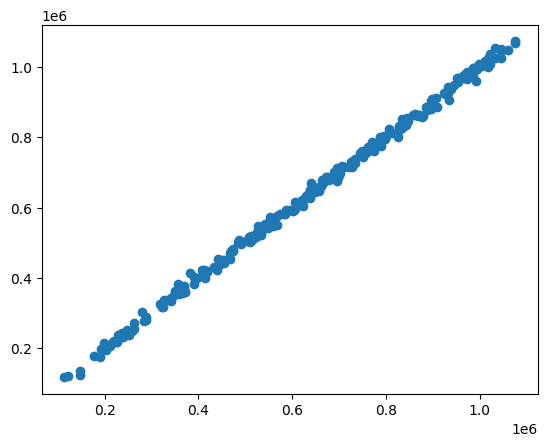

In [120]:
linear = LinearRegression()  # Creating a Linear Regression model
linear.fit(X_train_scaled, y_train)  # Fitting the model on the scaled training
y_pred = linear.predict(X_test_scaled)  # Making predictions on the scaled test set
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))  # Printing the R^2 score to evaluate the model's performance
plt.scatter(y_test, y_pred)
plt.show()

Mean Absolute Error: 8020.656851222364
Mean Squared Error: 103550432.91944571
R^2 Score: 0.998377581791882


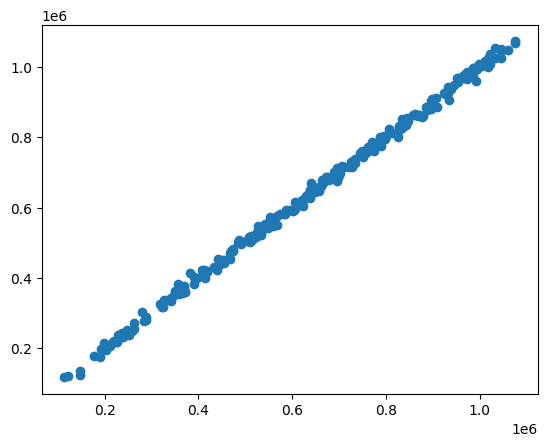

In [121]:
from sklearn.linear_model import Lasso
lasso = Lasso()  # Creating a Linear Regression model
lasso.fit(X_train_scaled, y_train)  # Fitting the model on the scaled training
y_pred = lasso.predict(X_test_scaled)  # Making predictions on the scaled test set
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))  # Printing the R^2 score to evaluate the model's performance
plt.scatter(y_test, y_pred)
plt.show()

Mean Absolute Error: 8010.510087902715
Mean Squared Error: 103489611.04461387
R^2 Score: 0.998378534743158


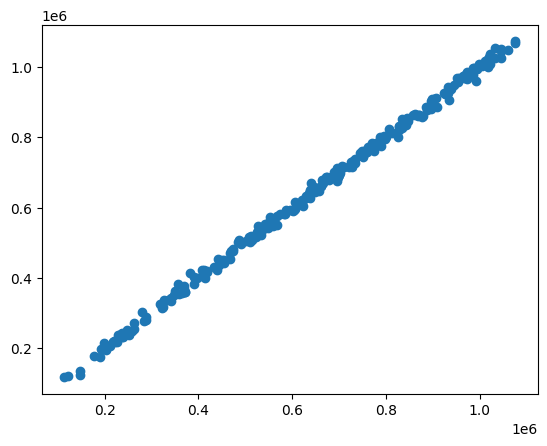

In [122]:
from sklearn.linear_model import Ridge
ridge = Ridge()  # Creating a Linear Regression model
ridge.fit(X_train_scaled, y_train)  # Fitting the model on the scaled training
y_pred = ridge.predict(X_test_scaled)  # Making predictions on the scaled test set
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))  # Printing the R^2 score to evaluate the model's performance
plt.scatter(y_test, y_pred)
plt.show()

Mean Absolute Error: 73673.33703070313
Mean Squared Error: 7491468243.729552
R^2 Score: 0.8826243971995769


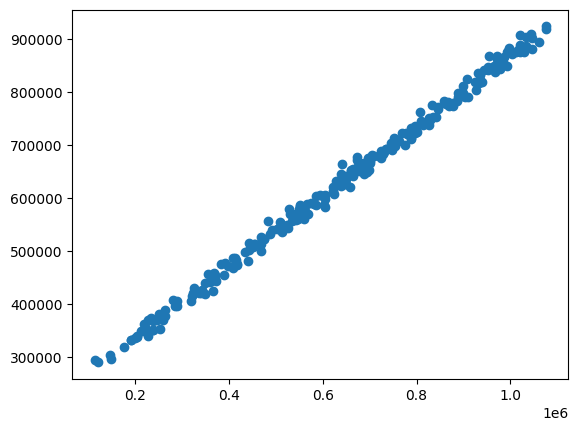

In [123]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet()  # Creating a Linear Regression model
elastic_net.fit(X_train_scaled, y_train)  # Fitting the model on the scaled training
y_pred = elastic_net.predict(X_test_scaled)  # Making predictions on the scaled test set
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))  # Printing the R^2 score to evaluate the model's performance
plt.scatter(y_test, y_pred)
plt.show()

In [124]:
# Cross-validation

Mean Absolute Error: 8033.355396182079
Mean Squared Error: 103407095.27450722
R^2 Score: 0.9983798275922954


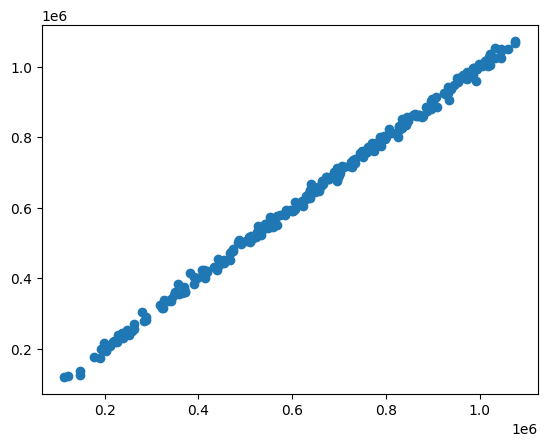

In [125]:
from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(cv = 5) # Creating a LassoCV model with 5-fold cross-validation
lasso_cv.fit(X_train_scaled, y_train)  # Fitting the model on the scaled training set
y_pred = lasso_cv.predict(X_test_scaled)  # Making predictions on the scaled test
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))  # Printing
plt.scatter(y_test, y_pred)
plt.show()

Mean Absolute Error: 8019.036964173975
Mean Squared Error: 103533652.51462285
R^2 Score: 0.9983778447056483


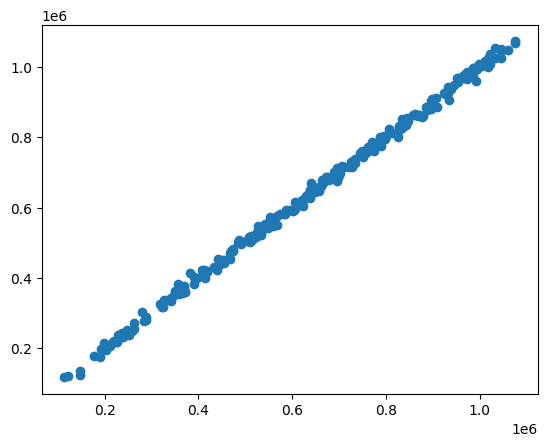

In [126]:
from sklearn.linear_model import RidgeCV

ridge_cv = RidgeCV(cv=5)  # Creating a RidgeCV model with 5-fold cross-validation
ridge_cv.fit(X_train_scaled, y_train)  # Fitting the model on the scaled
y_pred = ridge_cv.predict(X_test_scaled)  # Making predictions on the scaled test set
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))  # Printing
plt.scatter(y_test, y_pred)
plt.show()

Mean Absolute Error: 215321.06818834587
Mean Squared Error: 64463127710.67602
R^2 Score: -0.010002075330749927


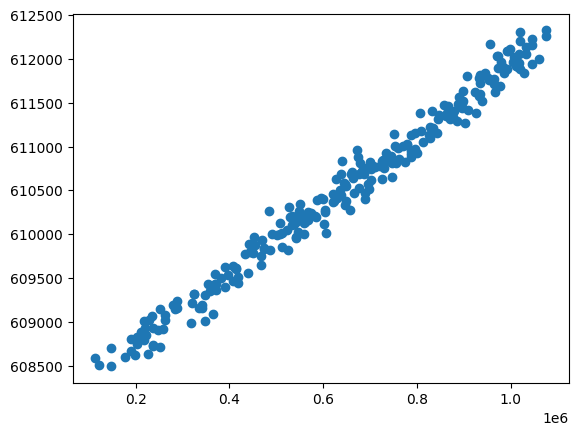

In [127]:
from sklearn.linear_model import ElasticNetCV

elastic_net_cv = ElasticNetCV(cv=5)  # Creating an ElasticNetCV model
elastic_net_cv.fit(X_train_scaled, y_train)  # Fitting the model on the scaled training set
y_pred = elastic_net_cv.predict(X_test_scaled)  # Making predictions on the scaled test set
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))  # Printing the R^2 score to evaluate the model's performance
plt.scatter(y_test, y_pred)
plt.show()

In [128]:
# Comparing the models
models = [LinearRegression(), Lasso(), Ridge(), ElasticNet(), LassoCV(), RidgeCV(), ElasticNetCV()]
model_scores = {}
for m in models:
    m.fit(X_train_scaled, y_train)  # Fitting the model on the scaled training set
    y_pred = m.predict(X_test_scaled)  # Making predictions on the scaled test set
    model_scores[m.__class__.__name__] = {
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'R^2': r2_score(y_test, y_pred)
    }
    
model_scores_df = pd.DataFrame(model_scores).T
model_scores_df.sort_values(by='R^2', ascending=False, inplace=True)
model_scores_df
    
    
    


,MAE,MSE,R^2
LassoCV,8033.355396,1.034071e+08,0.998380
Ridge,8010.510088,1.034896e+08,0.998379
RidgeCV,8019.036964,1.035337e+08,0.998378
Lasso,8020.656851,1.035504e+08,0.998378
LinearRegression,8020.572338,1.035509e+08,0.998378
ElasticNet,73673.337031,7.491468e+09,0.882624
ElasticNetCV,215321.068188,6.446313e+10,-0.010002


In [ ]:
df.tail()


,Square_Meter,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
995,302.956813,4,1,1978,2.165110,2,10,701493.997069
996,295.338764,1,2,1999,2.977123,1,10,683723.160704
997,242.105322,4,2,1962,4.055067,0,2,572024.023634
998,438.781058,5,2,1950,1.930921,0,7,964865.298639
999,303.607135,4,2,1983,3.108790,2,2,742599.253332


In [139]:
df["Lot_Size"].value_counts().index

Index([3.1087902476038645, 0.5996366396268326,   4.75301384940204,
        3.634822720478255,   2.73066687604351,  4.699072554837388,
        2.475930043628728,  4.911960066216673,  4.737095837302702,
        2.017862764103689,
       ...
        2.336535755716654,  3.529608977095392, 4.3578900606237845,
        3.251014709974911,  3.994201861929581,  4.781489129265565,
       3.9784402458751407, 3.5550397628502823, 3.9416043760667474,
       1.0142859649909075],
      dtype='float64', name='Lot_Size', length=1000)

In [ ]:
new_price = lasso_cv.predict(scaler.transform([[125, 3, 2, 2025, 2.5, 0, 7]]))
print("Predicted Price ", 40*new_price[0])

Predicted Price  12722329.058301711


c:\Users\AK127381\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
